In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel("./instrument.xlsx")
columns = data.columns.tolist()
columns

['T', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'V', 'Ax', 'Ay', 'Az', 'A']

In [2]:
def create_new_scheme(nums, file_name):
    """
    创建模拟数据
    :param nums: 创建模拟数据集的个数
    :param file_name: 原始数据集路径，xlsx格式
    """
    data = pd.read_excel(file_name)
    save_name = file_name.split(".")[0]
    i = 0
    while i < nums:
        n = np.random.randint(10)
        dd = data.copy()
        # if np.random.rand() > 0.5:
        for col in columns:
            if col == 'T':
                continue
            dd[col] = dd[col].map(lambda x:x + n * np.random.rand())
        dd.to_excel(save_name + f"instrument{i}.xlsx", index=0)
        i += 1
        
create_new_scheme(10, "./instrument.xlsx")
print("Done!")

Done!


In [3]:
import os
import glob
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score
import warnings


warnings.filterwarnings('ignore')


data = []
data_files = glob.glob("./*.xlsx")
# data_tables = []
# for file in data_files:
#     data_table = pd.read_excel(file)
#     data_tables.append(data_table)
for file in data_files:
    table = pd.read_excel(file)
    # table["speed"] = (table["Vx"] ** 2 + table["Vy"] ** 2 + table["Vz"] ** 2) ** 0.5
    # table["acceleration"] = (table["Ax"] ** 2  + table["Ay"] ** 2 + table["Az"] ** 2) ** 0.5
    table["dx"] = table["x"].diff().fillna(0)
    table["dy"] = table["y"].diff().fillna(0)
    table["dz"] = table["z"].diff().fillna(0)
    table["displacement"] = (table["dx"] ** 2 + table["dy"] ** 2 + table["dz"] ** 2) ** 0.5
    data = pd.DataFrame(data.append(table))
print(data)
data.to_csv("merge_data.csv", index=False, encoding='utf-8')

       T              x              y             z         Vx         Vy  \
0      1  440770.224649 -103444.224354  1.147019e+06  16.582321 -70.676614   
1      2  440786.071980 -103515.865270  1.146936e+06  17.494040 -74.377514   
2      3  440800.980607 -103595.573195  1.146855e+06  16.402916 -73.957392   
3      4  440816.655247 -103674.477626  1.146775e+06  18.976475 -76.068045   
4      5  440832.412819 -103750.894155  1.146694e+06  17.754284 -76.463736   
..   ...            ...            ...           ...        ...        ...   
96    97  442388.666729 -111760.756114  1.140930e+06  17.736493 -96.038470   
97    98  442406.306349 -111857.185047  1.140886e+06  17.731036 -96.145196   
98    99  442424.106607 -111953.228420  1.140842e+06  17.769165 -96.269959   
99   100  442441.815552 -112049.244906  1.140799e+06  17.807295 -96.394721   
100  101  442459.757954 -112146.075977  1.140756e+06  17.845424 -96.519483   

            Vz           V        Ax        Ay        Az       

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
import glob
import zipfile
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def polynomial_regression_fit(df, degree, target):
    x = df['T'].values.reshape(-1, 1)
    y = df[target].values

    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Polynomial Regression ({target}): MSE = {mse:.4f}, R-squared = {r2:.4f}")
    
    plt.figure()
    plt.style.use('tableau-colorblind10')
#     plt.style.use('tableau-colorblind10')
#     plt.scatter(x,y,color='blue',label=f"{target}(original data)")
#     plt.plot(np.sort(x,axis=0),model.predict(poly.fit_transform(np.sort(x,axis=0))),color='red',label=f"{target}(Polynomial Regression)")
    plt.scatter(x,y,color='blue',label=f"{target}(original data)")
    plt.plot(np.sort(x,axis=0),model.predict(poly.fit_transform(np.sort(x,axis=0))),color='yellow',label=f"{target}(Polynomial Regression)")
    plt.title(f"Polynomial Regression ({target})")
    plt.legend(loc='best')
#     return model.predict(x_poly)
#     return y_pred, mse, r2
    return y_pred


def gaussian_process_regression_fit(df, target):
    x = df['T'].values.reshape(-1, 1)
    y = df[target].values
    
#     kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

#     param_grid = {'kernel__k1__length_scale': np.linspace(0.1, 10, 10),
#                   'kernel__k2__noise_level': np.linspace(0.1, 10, 10)}

#     model = GaussianProcessRegressor(kernel=kernel, alpha=0.0, normalize_y=True, n_restarts_optimizer=10)
#     grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

#     grid_search.fit(x, y)

#     print(f"Best parameters: {grid_search.best_params_}")
#     print(f"Best score: {grid_search.best_score_}")

#     y_pred = grid_search.predict(x)

    kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
    model = GaussianProcessRegressor(kernel=kernel, alpha=0.0, normalize_y=True, n_restarts_optimizer=10)
    model.fit(x, y)
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Gaussian Process Regression ({target}): MSE = {mse:.4f}, R-squared = {r2:.4f}")
    plt.figure()
#     plt.style.use('seaborn-dark')
    plt.scatter(x,y,color='blue',label=f"{target}(original data)")
    plt.plot(x, y_pred, color='red', label=f"{target}(Gaussian Process Regression)")
    plt.title(f"Gaussian Process Regression ({target})")
    plt.legend(loc='best')
    
#     return y_pred, mse, r2
    return y_pred


def calculate_deviation(df, y_pred, target):
    deviation = df[target] - y_pred
    return deviation

def output_results(df, file_name):
    df.to_csv(file_name, index=False, encoding='utf-8')

def process_dataframe(df, degree=3):
    for target in ['V', 'A', 'displacement']:
#         y_pred = polynomial_regression_fit(df, degree, target)
#         deviation = calculate_deviation(df, y_pred, target)
#         df[f'{target}_pred'] = y_pred
#         df[f'{target}_deviation'] = deviation
        y_pred_poly = polynomial_regression_fit(df, degree, target)
        y_pred_gpr = gaussian_process_regression_fit(df, target)
        deviation_poly = calculate_deviation(df, y_pred_poly, target)
        deviation_gpr = calculate_deviation(df, y_pred_gpr, target)
        df[f'{target}_pred_poly'] = y_pred_poly
        df[f'{target}_pred_gpr'] = y_pred_gpr
        df[f'{target}_deviation_poly'] = deviation_poly
        df[f'{target}_deviation_gpr'] = deviation_gpr
        mse_poly = mean_squared_error(df[target], y_pred_poly)
        mse_gpr = mean_squared_error(df[target], y_pred_gpr)
        if mse_gpr < mse_poly:
            df[f'{target}_pred'] = y_pred_gpr
            df[f'{target}_deviation'] = deviation_gpr
        else:
            df[f'{target}_pred'] = y_pred_poly
            df[f'{target}_deviation'] = deviation_poly
            
    # output_file_name = f"{data.replace('.csv', '')}_processed.csv"
    output_file_name = f"merge_data_processed.csv"
    print(f"Saving processed data to {output_file_name}")
    output_results(df, output_file_name)
    return df

data_files = glob.glob("./*.xlsx")
degree = 3

Polynomial Regression (V): MSE = 1.9151, R-squared = 0.6830
Gaussian Process Regression (V): MSE = 1.7775, R-squared = 0.7058
Polynomial Regression (A): MSE = 1.7914, R-squared = 0.0192
Gaussian Process Regression (A): MSE = 1.7556, R-squared = 0.0388
Polynomial Regression (displacement): MSE = 113.1581, R-squared = 0.0928
Gaussian Process Regression (displacement): MSE = 1.7994, R-squared = 0.9856
Saving processed data to merge_data_processed.csv
       T              x              y             z         Vx         Vy  \
0      1  440770.224649 -103444.224354  1.147019e+06  16.582321 -70.676614   
1      2  440786.071980 -103515.865270  1.146936e+06  17.494040 -74.377514   
2      3  440800.980607 -103595.573195  1.146855e+06  16.402916 -73.957392   
3      4  440816.655247 -103674.477626  1.146775e+06  18.976475 -76.068045   
4      5  440832.412819 -103750.894155  1.146694e+06  17.754284 -76.463736   
..   ...            ...            ...           ...        ...        ...   
96

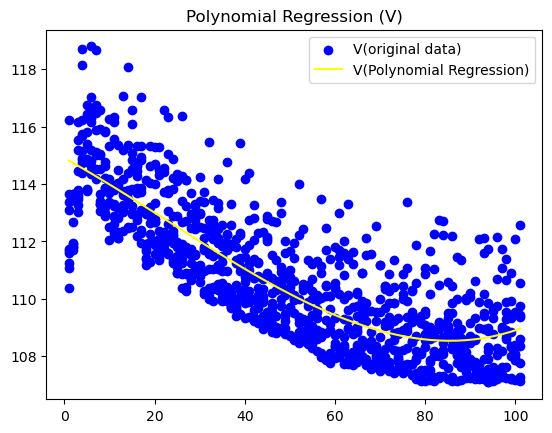

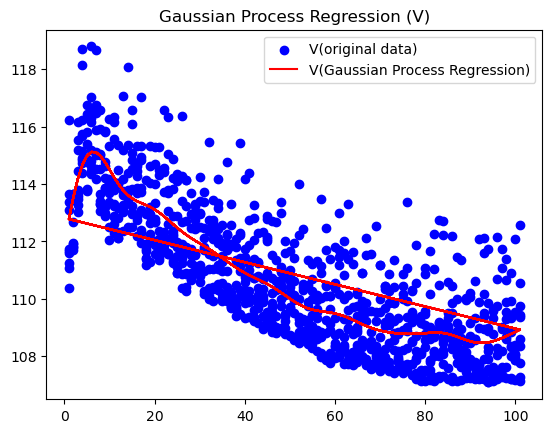

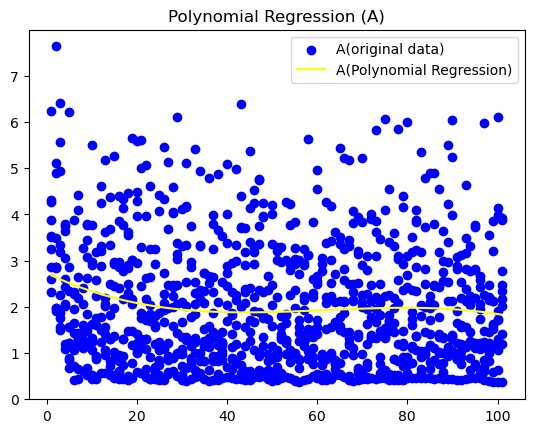

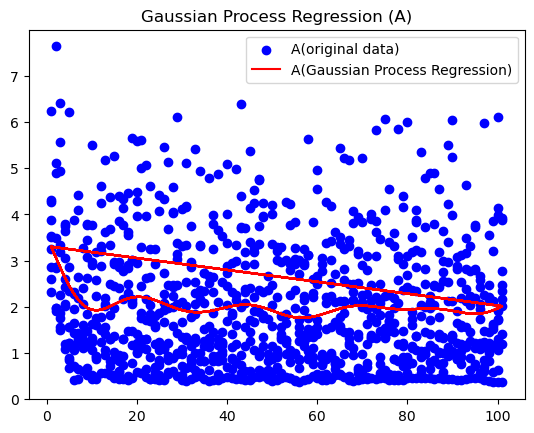

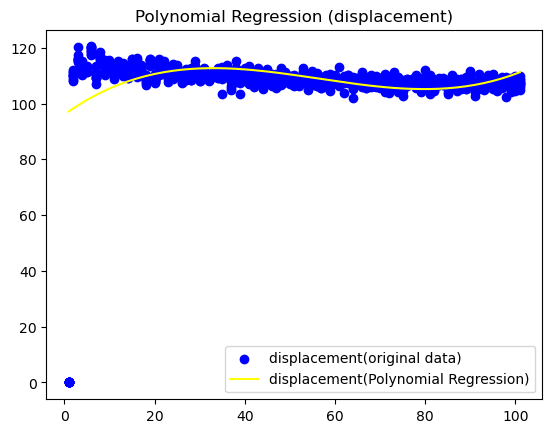

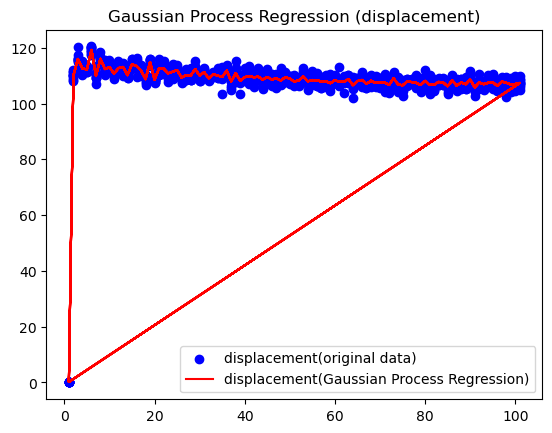

In [5]:
# def read_excel_and_calculate_displacement(file):
#     data = []
#     file_extension = file.split('.')[-1]
#     if file_extension == 'xlsx':
#         engine = 'openpyxl'
#     elif file_extension == 'xls':
#         engine = 'xlrd'
#     else:
#         raise ValueError('Unsupported file extension.')
#     try:
#         table = pd.read_excel(file, engine=engine)
#     except zipfile.BadZipFile:
#         print(f"Error: BadZipFile for file {file}")
#         return None
#     table["dx"] = table["x"].diff().fillna(0)
#     table["dy"] = table["y"].diff().fillna(0)
#     table["dz"] = table["z"].diff().fillna(0)
#     table["displacement"] = (table["dx"] ** 2 + table["dy"] ** 2 + table["dz"] ** 2) ** 0.5
#     df = pd.DataFrame(data.append(table))
#     return df
# data = []
# data_files = glob.glob("./*.xlsx")
# for file in data_files:
#     input_df = read_excel_and_calculate_displacement(file)
# print(input_df)
if data is not None:
    output_df = process_dataframe(data, degree)
    print(f'{data} Done!')
    print("----------------------------------------------------------------------------------------")

In [6]:
# for file in data_files:
# #   if file.startswith('instrument'):
#     input_df = read_excel_and_calculate_displacement(file)
#     if input_df is not None:
#         output_df = process_dataframe(input_df, degree)
#         print(f'{file} Done!')
#         print("----------------------------------------------------------------------------------------")
# #             output_file = file.replace('.xlsx', '_output.csv')
# #             output_results(output_df, output_file)
# #             print(file)
# print(f"Complete all processing steps.")

In [7]:
import os
import pandas as pd

# path = os.path.dirname(os.path.abspath(__file__))
path = os.getcwd()
# merged_df = pd.DataFrame()
merged_df = pd.read_csv("merge_data_processed.csv")
merged_df = pd.DataFrame(merged_df)
merged_df.info()
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        df = pd.read_excel(os.path.join(path, file))
        df = pd.DataFrame(df)
        merged_df = pd.merge(df, merged_df, on=["T", "x", "y", "z", "Vx", "Vy", "Vz", "V", "Ax", "Ay", "Az", "A"], how='left')
#         merged_df.to_excel(filename + "_merge.xlsx", index=False)
        # merged_df = pd.concat([merged_df, df], axis=1)
        filename = os.path.splitext(file)[0]
        output_file_name = f"{filename.replace('.xlsx', '')}_processed.csv"
        output_results(merged_df, output_file_name)
        print(f"Saving processed data to {output_file_name}")
        print(f'{file} Done!')
# merged_df.to_excel(filename + "_processed.xlsx", index=False)
print(f"Complete all processing steps.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   T                            1010 non-null   int64  
 1   x                            1010 non-null   float64
 2   y                            1010 non-null   float64
 3   z                            1010 non-null   float64
 4   Vx                           1010 non-null   float64
 5   Vy                           1010 non-null   float64
 6   Vz                           1010 non-null   float64
 7   V                            1010 non-null   float64
 8   Ax                           1010 non-null   float64
 9   Ay                           1010 non-null   float64
 10  Az                           1010 non-null   float64
 11  A                            1010 non-null   float64
 12  dx                           1010 non-null   float64
 13  dy                